In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
Train_data = pd.read_csv('./train.csv')

In [3]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt 
Test_data = pd.read_csv('./testA.csv')

In [4]:
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [5]:
Test_data.head().append(Test_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [6]:
Train_data.describe()

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [7]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [8]:
Test_data.describe()

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [9]:
Train_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [10]:
Test_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [11]:
Train_data['label']

0        0.0
1        0.0
2        2.0
3        0.0
4        2.0
        ... 
99995    0.0
99996    2.0
99997    3.0
99998    2.0
99999    0.0
Name: label, Length: 100000, dtype: float64

In [12]:
Train_data['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

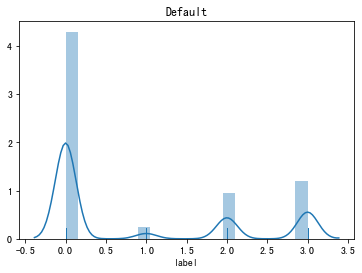

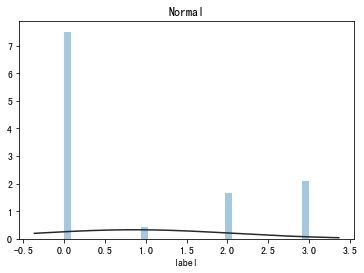

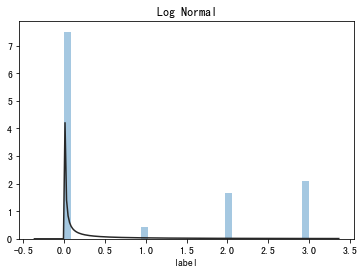

In [13]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['label']
plt.figure(1); plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 0.871005
Kurtosis: -1.009573


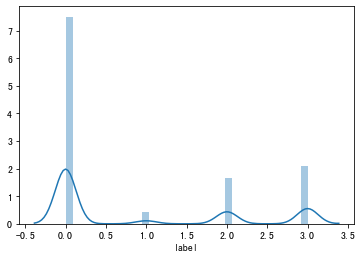

In [14]:
# 2）查看skewness and kurtosis
sns.distplot(Train_data['label']);
print("Skewness: %f" % Train_data['label'].skew())
print("Kurtosis: %f" % Train_data['label'].kurt())

In [15]:
Train_data.skew(), Train_data.kurt()

(id       0.000000
 label    0.871005
 dtype: float64,
 id      -1.200000
 label   -1.009573
 dtype: float64)

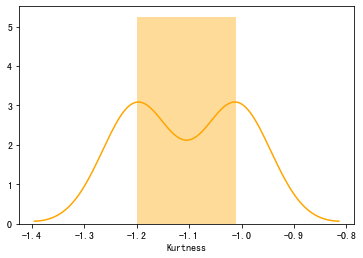

In [16]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

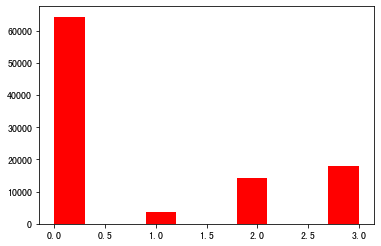

In [17]:
plt.hist(Train_data['label'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [19]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")